In [1]:
#!pip uninstall sklearn
#!pip uninstall scikit-learn
#!pip install -U numpy
#!pip install numpy
#!pip install -U pandas
#!pip install pandas
#!pip install -U scipy
#!pip install scipy
#!pip install -U scikit-learn
#!pip install scikit-learn
#!pip install sklearn
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
#!pip install -U wget
#!pip install wget
#!pip install -U geopy
#!pip install geopy
#!pip install -U folium
#!pip install folium
#!pip install folium==0.5.0
#!pip install xlrd
#!pip install -U xlrd
#!pip install openpyxl
#!pip install -U openpyxl
#!pip install geocoder
#!pip install geopandas
print('...INSTALLS DONE')

...INSTALLS DONE


In [2]:
import numpy as np                                   # library to handle data in a vectorized manner
import pandas as pd                                  # library for data analsysis
from pandas import json_normalize                    # module to tranform JSON file into a pandas dataframe
import json                                          # library to handle JSON files
import requests                                      # library to handle requests such as when webscraping
# import sklearn                                       # library for predictive data analysis
# from sklearn.model_selection import train_test_split # module for splitting data for test and train
# from sklearn.cluster import KMeans                   # module for KMeans Clustering
# from sklearn import svm                              # module for Support Vector Machines Classification
# from sklearn.neighbors import KNeighborsClassifier   # module for K Nearest Neighbor Classification
# from sklearn.linear_model import LogisticRegression  # module for Logistic Regression Classification
# from sklearn.tree import DecisionTreeClassifier      # module for Decision Tree Classification
# from sklearn import tree                             # module for visualizing Decision Trees
# from sklearn import preprocessing                    # module for standardizes data for downstream estimators
# from sklearn import metrics                          # module for computes subset accuracy
# from sklearn.metrics import confusion_matrix         # module for Confusion Matrix display
# from sklearn.metrics import jaccard_score            # module for Jaccard scoring
# from sklearn.metrics import classification_report    # module for Classification Report
# from sklearn.metrics import log_loss                 # module for Log Loss scoring
# from sklearn.metrics import f1_score                 # module for F1 scoring
import matplotlib.pyplot as plt                      # module for interactive plots
import matplotlib.cm as cm                           # module for colormap handling
import matplotlib.colors as colors                   # module for converting numbers or color arguments to RGB or RGBA
import matplotlib.image as mpimg                     # module for basic image loading, rescaling and display operations
import urllib.request                                # module for pulling in URL data
import wget                                          # module for importing externally hosted files
#import xlrd                                          # library for importing Excel .xls files (but not .xlsx)
#from openpyxl import Workbook                        # module to write to a new Excel file
#from openpyxl import load_workbook                   # module to import Excel files (including .xlsx)
import folium                                        # library for map rendering
import geopandas                                     # library for mapping
import fiona                                         # dependency of geopandas
import shapely                                       # dependency of geopandas
import pyproj                                        # dependency of geopandas
import rtree                                         # dependency of geopandas
import descartes                                     # dependency of geopandas
#import pylab as pl                                   # pylab is a convenience module that bulk imports matplotlib.pyplot and numpy, no longer recommended
# import scipy.optimize as opt                         # package provides several commonly used optimization algorithms
import itertools                                     # library for creating iterators for efficient looping
from io import StringIO                              # library to create an in-memory file-like object
# from bs4 import BeautifulSoup                        # library for webscraping
from geopy.geocoders import Nominatim                # library to find lat/long from address

#%matplotlib inline                                   # magic function so output of plotting commands is displayed inline
#import pydotplus                                     # library for Python interface to Graphviz's Dot language
#from pandas.io.json import json_normalize            # deprecated version of tranform JSON file into a pandas dataframe

print('...LIBRARIES IMPORTED')

...LIBRARIES IMPORTED


In [29]:
# @hidden_cell
# text above will make this cell hidden when shared from Watson Studio to GitHub

my_id = 'XXXX'
my_secret = 'XXXX'
my_token = 'XXXX'
census_key = 'XXXX'

print('...HIDDEN VARIABLES SET')

...HIDDEN VARIABLES SET


In [4]:
# setting some basic variables

CLIENT_ID = my_id                          # your Foursquare ID
CLIENT_SECRET = my_secret                  # your Foursquare Secret
ACCESS_TOKEN = my_token                    # your Foursquare Access Token
VERSION = '20210401'                       # Foursquare API version
LIMIT = 15                                 # A default Foursquare API limit value
RADIUS = 100                               # search / explore radius in meters
VENUE_SEARCH = '4af3a181f964a520fcee21e3'  # ID of venue to be searched for
SEARCH_LOC = 'Boston, MA'                  # location key for SEARCH or EXPLORE endpoint (near=)
SEARCH_CAT_ID = '4d4b7105d754a06374d81259' # category key for SEARCH or EXPLORE endpoint (categoryId=)
SECTION = 'food'                           # section key for EXPLORE endpoint (section=)
OFFSET = 100                               # offset key for EXPLORE endpoint (offset=)

print('...FOURSQUARE API CREDENTIALS SET')

...FOURSQUARE API CREDENTIALS SET


In [5]:
# geolocator to get basic coordinates
address = 'Boston, MA'
geolocator = Nominatim(user_agent="rsgd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("coordinates: latitude",latitude,"/ longitude",longitude)

coordinates: latitude 42.3602534 / longitude -71.0582912


In [6]:
# download countries geojson file
GeoDataJSON=geopandas.read_file('https://opendata.arcgis.com/datasets/4a8eb4fb3be44ed5a1eec28551b9f3b2_0.geojson')
GeoDataJSON.head()

,FID,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,Shape__Area,Shape__Length,geometry
0,1,1,25,025,010405,25025010405,104.05,Census Tract 104.05,G5020,S,363702,0,+42.3398654,-071.0896052,3.914568e+06,14629.550361,666099.906250,6036.192858,"POLYGON ((-71.09009 42.34667, -71.09001 42.346..."
1,2,2,25,025,010404,25025010404,104.04,Census Tract 104.04,G5020,S,136829,0,+42.3419667,-071.0886375,1.472714e+06,5277.643216,250612.402344,2176.592125,"POLYGON ((-71.09066 42.33977, -71.09103 42.339..."
2,3,3,25,025,010801,25025010801,108.01,Census Tract 108.01,G5020,S,127905,0,+42.3541193,-071.0770216,1.376667e+06,6166.497167,234357.902344,2542.042976,"POLYGON ((-71.08160 42.35371, -71.08044 42.354..."
3,4,4,25,025,010702,25025010702,107.02,Census Tract 107.02,G5020,S,299981,0,+42.3518354,-071.0755159,3.228780e+06,7818.852369,549614.046875,3224.572988,"POLYGON ((-71.07066 42.35186, -71.07046 42.351..."
4,5,5,25,025,010204,25025010204,102.04,Census Tract 102.04,G5020,S,254706,0,+42.3462887,-071.1033879,2.741497e+06,7621.654206,466585.234375,3143.610963,"POLYGON ((-71.10683 42.34876, -71.10520 42.348..."


<AxesSubplot:>

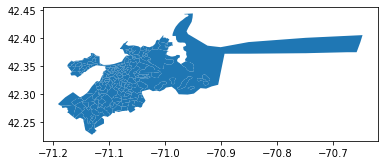

In [7]:
# geopandas "plot()" will plot what's in the GeoJSON itself, not overlaid on a folium map
GeoDataJSON.plot()

In [8]:
# importing list of neighborhoods
BPDA_Neighborhoods = pd.read_csv('BPDA_Neighborhoods.csv').astype('object')
BPDA_Neighborhoods.head()

,GEOID10,NAME10,NAMELSAD10,2014 BPDA Neighborhood
0,25025990101,9901.01,Census Tract 9901.01,(water)
1,25025000703,7.03,Census Tract 7.03,Allston
2,25025000704,7.04,Census Tract 7.04,Allston
3,25025000802,8.02,Census Tract 8.02,Allston
4,25025000803,8.03,Census Tract 8.03,Allston


In [9]:
# adding Neighborhood data to GeoDataJSON. This appears to turn it into a dataframe, we will fix later.
Boston_Geo = pd.merge(GeoDataJSON, BPDA_Neighborhoods, on='NAMELSAD10') # join on key
Boston_Geo.drop(columns=['GEOID10_y', 'NAME10_y'], inplace=True) # drop duplicate columns
Boston_Geo.rename(columns={"2014 BPDA Neighborhood":"Neighborhood", "GEOID10_x":"GEOID10", "NAME10_x":"NAME10"}, inplace=True) # rename Neighborhood column
Boston_Geo.head()

,FID,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,Shape__Area,Shape__Length,geometry,Neighborhood
0,1,1,25,025,010405,25025010405,104.05,Census Tract 104.05,G5020,S,363702,0,+42.3398654,-071.0896052,3.914568e+06,14629.550361,666099.906250,6036.192858,"POLYGON ((-71.09009 42.34667, -71.09001 42.346...",Fenway
1,2,2,25,025,010404,25025010404,104.04,Census Tract 104.04,G5020,S,136829,0,+42.3419667,-071.0886375,1.472714e+06,5277.643216,250612.402344,2176.592125,"POLYGON ((-71.09066 42.33977, -71.09103 42.339...",Fenway
2,3,3,25,025,010801,25025010801,108.01,Census Tract 108.01,G5020,S,127905,0,+42.3541193,-071.0770216,1.376667e+06,6166.497167,234357.902344,2542.042976,"POLYGON ((-71.08160 42.35371, -71.08044 42.354...",Back Bay
3,4,4,25,025,010702,25025010702,107.02,Census Tract 107.02,G5020,S,299981,0,+42.3518354,-071.0755159,3.228780e+06,7818.852369,549614.046875,3224.572988,"POLYGON ((-71.07066 42.35186, -71.07046 42.351...",Back Bay
4,5,5,25,025,010204,25025010204,102.04,Census Tract 102.04,G5020,S,254706,0,+42.3462887,-071.1033879,2.741497e+06,7621.654206,466585.234375,3143.610963,"POLYGON ((-71.10683 42.34876, -71.10520 42.348...",Fenway


In [10]:
# limiting to just one neighborhood for debug purposes
Boston_Geo = Boston_Geo.query('Neighborhood == "East Boston"')
Boston_Geo.head()

,FID,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,Shape__Area,Shape__Length,geometry,Neighborhood
45,46,46,25,025,981300,25025981300,9813,Census Tract 9813,G5020,S,7157254,2015092,+42.3611289,-071.0069754,9.872376e+07,51444.098697,1.681174e+07,21227.256294,"POLYGON ((-71.02701 42.35599, -71.02635 42.357...",East Boston
132,133,133,25,025,981502,25025981502,9815.02,Census Tract 9815.02,G5020,S,1252250,27493,+42.3963670,-071.0043791,1.377421e+07,18707.110038,2.348014e+06,7724.012919,"POLYGON ((-70.99505 42.39357, -70.99508 42.393...",East Boston
136,137,137,25,025,051200,25025051200,512,Census Tract 512,G5020,S,412098,496108,+42.3642605,-071.0365915,9.775170e+06,18966.898700,1.664564e+06,7828.417607,"POLYGON ((-71.03963 42.36179, -71.04013 42.362...",East Boston
137,138,138,25,025,050700,25025050700,507,Census Tract 507,G5020,S,271727,0,+42.3753575,-071.0332714,2.924637e+06,8534.260165,4.982100e+05,3521.310364,"POLYGON ((-71.03445 42.37272, -71.03460 42.372...",East Boston
138,139,139,25,025,050600,25025050600,506,Census Tract 506,G5020,S,169229,0,+42.3718877,-071.0372695,1.821435e+06,6323.970277,3.102467e+05,2610.426084,"POLYGON ((-71.03515 42.37302, -71.03509 42.372...",East Boston


In [11]:
# create "getNearbyVenues" function with Lat+Lng from input, remainder from basic variables at top

def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&section={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            SECTION,
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['location']['distance']
            ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue_ID',
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category',
                  'Venue_Distance']
    
    return(nearby_venues)
print("...'getNearbyVenues' FUNCTION CREATED")

...'getNearbyVenues' FUNCTION CREATED


In [12]:
# to run function
boston_venues = getNearbyVenues(names=Boston_Geo['Neighborhood'],
                                   latitudes=Boston_Geo['INTPTLAT10'],
                                   longitudes=Boston_Geo['INTPTLON10'])

East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston
East Boston


In [13]:
boston_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_ID,Venue_Latitude,Venue_Longitude,Venue_Category,Venue_Distance
0,East Boston,+42.3718877,-071.0372695,John's Pizza,4f3247f619836c91c7c8350a,42.372196,-71.036446,Pizza Place,75
1,East Boston,+42.3718877,-071.0372695,Tamales Y Re Algo Mas,4f3258f619836c91c7ced3fc,42.372196,-71.036446,Food,75
2,East Boston,+42.3854556,-071.0043188,Maya Inca International Resturant,4f32581619836c91c7ce7dad,42.385929,-71.005087,Food,82
3,East Boston,+42.3873027,-071.0161271,The Bistro At The Courtyard Marriott,4d281e8f6e27a143bad41624,42.387465,-71.016483,Café,34
4,East Boston,+42.3873027,-071.0161271,Brinkleys Restaurant & Lounge,4f4ac7b1e4b0605e44fd2484,42.387382,-71.016503,American Restaurant,32


In [14]:
# boston_venues = boston_venues.query('Venue_Category == "Pizza Place"')
boston_venues.shape

(6, 9)

In [15]:
# sorting the data
# adding last two arguements resets the index to the new order
boston_venues.sort_values(by=['Venue_ID','Venue_Distance'], ignore_index=True, inplace=True)
boston_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue_ID,Venue_Latitude,Venue_Longitude,Venue_Category,Venue_Distance
0,East Boston,+42.3873027,-071.0161271,The Bistro At The Courtyard Marriott,4d281e8f6e27a143bad41624,42.387465,-71.016483,Café,34
1,East Boston,+42.3718877,-071.0372695,John's Pizza,4f3247f619836c91c7c8350a,42.372196,-71.036446,Pizza Place,75
2,East Boston,+42.3854556,-071.0043188,Maya Inca International Resturant,4f32581619836c91c7ce7dad,42.385929,-71.005087,Food,82
3,East Boston,+42.3718877,-071.0372695,Tamales Y Re Algo Mas,4f3258f619836c91c7ced3fc,42.372196,-71.036446,Food,75
4,East Boston,+42.3873027,-071.0161271,Brinkleys Restaurant & Lounge,4f4ac7b1e4b0605e44fd2484,42.387382,-71.016503,American Restaurant,32
5,East Boston,+42.3816657,-071.0397908,La Cuisine de Choupit,513d1bbbe4b0c0ddfdca1411,42.382488,-71.039513,Caribbean Restaurant,94


In [16]:
# removing duplicate entries
# the "subset" parameter specifies which columns to match on, otherwise it matches on all fields
length_before = len(boston_venues)
boston_venues.drop_duplicates(subset=['Venue_ID', 'Venue_Latitude', 'Venue_Longitude'], keep='first', ignore_index=True,inplace=True)
length_after = len(boston_venues)
print("before",length_before,"/ after",length_after)

before 6 / after 6


In [17]:
for col in boston_venues.columns:
    print(col)

Neighborhood
Neighborhood Latitude
Neighborhood Longitude
Venue
Venue_ID
Venue_Latitude
Venue_Longitude
Venue_Category
Venue_Distance


In [18]:
# converting the merged Boston_Geo dataframe back into a JSON for use in a map
BostonGeo = Boston_Geo.to_json()

In [19]:
# creating the base map
map_test = folium.Map(location=[latitude, longitude], zoom_start=12)

In [20]:
# adding GeoJSON and labels to base map
gjson = folium.GeoJson(BostonGeo).add_to(map_test)
folium.features.GeoJsonPopup(fields=['Neighborhood','NAMELSAD10'],
        labels=False).add_to(gjson)

In [21]:
# adding venue markers to base map
for lat, lng, venue, category in zip(boston_venues['Venue_Latitude'], boston_venues['Venue_Longitude'], boston_venues['Venue'], boston_venues['Venue_Category']):
    label = '{}, {}'.format(venue,category)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue', # can be basic color name or hex
        fill=True,
        fill_color='green', # can be basic color name or hex
        fill_opacity=0.7,
        parse_html=False).add_to(map_test)

In [22]:
map_test

In [23]:
# example of URL:
# https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=-71.090477&y=42.339985&benchmark=4&vintage=410&format=json
# x = longitude
# y = latitude
# benchmark (4) = Public_AR_Current
# vintage (410) = Census2010_Current

url_single_geocode = 'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={}&y={}&benchmark=4&vintage=410&format=json'.format(
    longitude,
    latitude)
url_single_geocode

'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=-71.0582912&y=42.3602534&benchmark=4&vintage=410&format=json'

In [24]:
results_single_geocode = requests.get(url_single_geocode).json()
geocode_single_info = results_single_geocode['result']['geographies']['Census Tracts'][0] # pick relevant JSON bits for df
geocode_single_info = json_normalize(geocode_single_info) # tranform geocode_single_info into a dataframe
geocode_single_info.head()

,POP100,GEOID,CENTLAT,AREAWATER,STATE,BASENAME,OID,LSADC,FUNCSTAT,INTPTLAT,NAME,OBJECTID,TRACT,CENTLON,AREALAND,INTPTLON,HU100,MTFCC,UR,COUNTY
0,4872,25025030300,+42.3601789,242405,25,303,20740210228869,CT,S,+42.3599616,Census Tract 303,39075,030300,-071.0536425,683811,-071.0532464,2960,G5020,U,025


In [25]:
results_single_geocode

{'result': {'input': {'benchmark': {'id': '4',
    'benchmarkName': 'Public_AR_Current',
    'benchmarkDescription': 'Public Address Ranges - Current Benchmark',
    'isDefault': False},
   'vintage': {'id': '410',
    'vintageName': 'Census2010_Current',
    'vintageDescription': 'Census2010 Vintage - Current Benchmark',
    'isDefault': False},
   'location': {'x': -71.0582912, 'y': 42.3602534}},
  'geographies': {'States': [{'STATENS': '00606926',
     'POP100': 6547629,
     'GEOID': '25',
     'CENTLAT': '+42.1618521',
     'AREAWATER': 7130657825,
     'STATE': '25',
     'BASENAME': 'Massachusetts',
     'STUSAB': 'MA',
     'OID': 27440203627104,
     'LSADC': '00',
     'FUNCSTAT': 'A',
     'INTPTLAT': '+42.1565196',
     'DIVISION': '1',
     'NAME': 'Massachusetts',
     'REGION': '1',
     'OBJECTID': 22,
     'CENTLON': '-071.4975229',
     'AREALAND': 20204525349,
     'INTPTLON': '-071.4895915',
     'HU100': 2808254,
     'MTFCC': 'G4000',
     'UR': 'M'}],
   'Countie

In [26]:
for col in geocode_single_info.columns:
    print(col)

POP100
GEOID
CENTLAT
AREAWATER
STATE
BASENAME
OID
LSADC
FUNCSTAT
INTPTLAT
NAME
OBJECTID
TRACT
CENTLON
AREALAND
INTPTLON
HU100
MTFCC
UR
COUNTY


In [27]:
# create "getCensusInfo" function with Lat+Lng from input
def getCensusInfo(ven_ids, lats, lons):
    census_list=[]
    for ven_id, lat, lng in zip(ven_ids, lats, lons):
        print(ven_id)
            
        # create the API request URL
        # url_batch_geocode = 'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={}&y={}&benchmark=4&vintage=410'.format(
        url_batch_geocode = 'https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x={}&y={}&benchmark=4&vintage=410&format=json'.format(
            lng,
            lat)

        # make the GET request
        # results_batch_geocode = requests.get(url_batch_geocode).json()
        # geocode_batch_info = results_batch_geocode['result']['geographies']['Census Tracts'][0]
        # geocode_batch_info = json_normalize(geocode_batch_info)
        census_results = requests.get(url_batch_geocode).json()['result']['geographies']['Census Tracts'][0]
        
        # return only relevant information for each nearby venue
        census_list.append([(ven_id,
                             lat,
                             lng,
                             v['POP100'],
                             v['GEOID'],
                             v['INTPTLAT'],
                             v['NAME'],
                             v['INTPTLON'],
                             v['HU100']
                             # ) for v in geocode_batch_info])
                            ) for v in census_results])

    census_info = pd.DataFrame([item for loc_list in census_list for item in loc_list])
    census_info.columns = ['Venue_ID',
                           'Venue_Latitude',
                           'Venue_Longitude',
                           'Population',
                           'GEOID',
                           'INTPTLAT',
                           'NAME',
                           'INTPTLON',
                           'Housing_Units'
                          ]
    
    return(census_info)
print("...'getCensusInfo' FUNCTION CREATED")

...'getCensusInfo' FUNCTION CREATED


In [28]:
census_response = getCensusInfo(ven_ids=boston_venues['Venue_ID'],
                                lats=boston_venues['Venue_Latitude'],
                                lons=boston_venues['Venue_Longitude'])

4d281e8f6e27a143bad41624


TypeError: string indices must be integers

In [ ]:
census_response.head()